In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the dataset
df = pd.read_csv("EmailDataSet .csv")

df.tail()

,body,label
80669,There seems to be an issue with your package. ...,0.0
80670,Join our beta test and get a chance to earn $5...,1.0
80671,Just a reminder about tomorrow's meeting where...,0.0
80672,Congratulations! Your secret shopping reward i...,1.0
80673,We wanted to inform you about some changes we'...,0.0


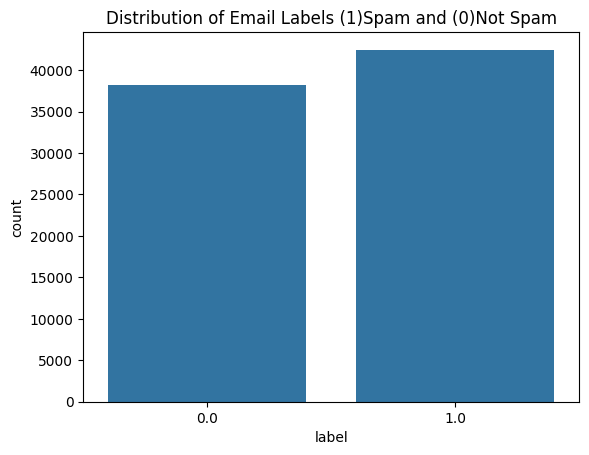

In [9]:
import seaborn as sns
sns.countplot(x='label', data=df)
plt.title("Distribution of Email Labels (1)Spam and (0)Not Spam")
plt.show()

In [10]:
# Drop rows with missing labels
df = df.dropna(subset=["label"])
print(df['label'].value_counts())

label
1.0    42451
0.0    38164
Name: count, dtype: int64


In [13]:
print(df.duplicated().sum())
# Drop duplicates if any
df.drop_duplicates(inplace=True)
print(df.shape)

0
(80615, 2)


In [ ]:

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer



# Clean the email text with stopword removal and stemming
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords and perform stemming (Reduces words to their root form)
    ps = PorterStemmer()
    sw = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens if word not in sw and len(word) > 1]

    clean_text = ' '.join(tokens)
    return clean_text

df["clean_body"] = df["body"].apply(clean_text)

# Character-level tokenization
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df["clean_body"])
sequences = tokenizer.texts_to_sequences(df["clean_body"])

# Padding
max_seq_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

# Labels
y = df["label"].astype(int).values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model parameters
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
embedding_dim = 64


In [ ]:
# Build model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Bidirectional(LSTM(64, return_sequences=False)), #final summary of the sequence, not the full sequence
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [ ]:
# Compile update w and b
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 803s 790ms/step - accuracy: 0.8008 - loss: 0.4257 - val_accuracy: 0.9112 - val_loss: 0.2242
Epoch 2/5
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 801s 795ms/step - accuracy: 0.9246 - loss: 0.1972 - val_accuracy: 0.9455 - val_loss: 0.1403
Epoch 3/5
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 843s 837ms/step - accuracy: 0.9391 - loss: 0.1621 - val_accuracy: 0.9378 - val_loss: 0.1744
Epoch 4/5
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 922s 896ms/step - accuracy: 0.9466 - loss: 0.1525 - val_accuracy: 0.9542 - val_loss: 0.1172
Epoch 5/5
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 958s 949ms/step - accuracy: 0.9566 - loss: 0.1206 - val_accuracy: 0.9597 - val_loss: 0.1094


In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {accuracy:.2f}')

504/504 ━━━━━━━━━━━━━━━━━━━━ 86s 171ms/step - accuracy: 0.9592 - loss: 0.1057

Test Accuracy: 0.96


In [8]:
# Predict and analyze
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

504/504 ━━━━━━━━━━━━━━━━━━━━ 89s 174ms/step

Confusion Matrix:
[[7446  136]
 [ 514 8027]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7582
           1       0.98      0.94      0.96      8541

    accuracy                           0.96     16123
   macro avg       0.96      0.96      0.96     16123
weighted avg       0.96      0.96      0.96     16123



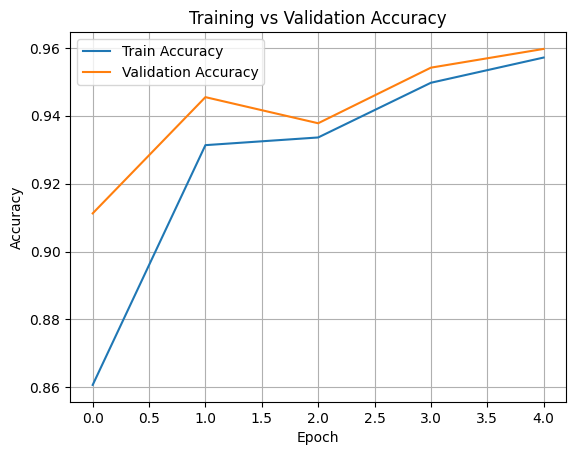

In [9]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences


def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Sample email content
sample_email = """
Dear Students,


The Capital University of Science & Technology (CUST), Islamabad, is thrilled to invite you to the 10th ExcITe Cup and CUST Hackathon 2025, a national-level competition celebrating innovation, technology, and talent. This event offers a platform for students across Pakistan to showcase their skills, compete in diverse challenges, and network with peers and industry professionals.

Hackathon 2025: AI for Sustainable Future:
A platform to showcase innovative solutions using Artificial Intelligence to address sustainability challenges.  

10th ExcITe Cup 2025:
A national competition featuring a variety of challenges to test your skills and creativity:


On Spot Programming

Quiz Competition

Software Project Exhibition

On Spot Poster Design

E-Gaming (FIFA 19 & Tekken 7)

Table Tennis

Thematic Video Design

📅 Event Dates:

10th ExcITe Cup: Saturday, May 17, 2025

Hackathon 2025: Friday, May 16, 2025 (Online)
                             Saturday, May 17, 2025 (On Campus)                                                                                                                                                             (Note: Hackathon is a separate event; please register accordingly.)

💰 Registration Details:

10th ExcITe Cup:

Individual Competitions: Rs. 1,500 each

Team Competitions: Rs. 4,000 per team

Hackathon 2025:

Rs. 5,000 per team

Rs. 2,000 per person

Registration Deadline: 10th May, 2025
Step 1: Register Now 
             ExcITe Cup 2025 Registration Form: https://docs.google.com/forms/d/e/1FAIpQLSfi3amvhFoot_QjotdlDLd7XRR3c_BvzHLQc8dz8rg20IpHsg/viewform 
             Hackathon 2025 Registration Form: https://docs.google.com/forms/d/e/1FAIpQLSfpKqds0cCbh9bEaf8cuhM6zwoJ4UIrsUYn5r8AEmdOFSjVOw/viewform
Step 2: After registration at the competition fill out this form for transport provision by FUI: https://forms.gle/VPvrE7UPvTVYdf1A7
               (To be filled by Team Lead only)

We highly encourage early registration to ensure smooth coordination and necessary arrangements. Don't miss this opportunity to challenge yourself, network with peers, and showcase your talents. Looking forward to your enthusiastic participation!  
Thank you

Best Regards,

--
Maria Saddiqua

 Lecturer Software Engineering Department

 Foundation University Islamabad

 NewLalazar, Rawalpindi

 Email:  maria.siddique@fui.edu.pk

"""


cleaned = clean_text(sample_email)


seq = tokenizer.texts_to_sequences([cleaned])


padded = pad_sequences(seq, maxlen=max_seq_length, padding='post')


prediction = model.predict(padded, verbose=0)


phishing_probability = prediction[0][0]
predicted_label = "Phishing" if phishing_probability >= 0.5 else "Legitimate"


print(f"Phishing Probability: {phishing_probability:.4f}")
print(f"Predicted Label: {predicted_label}")


Phishing Probability: 0.3032
Predicted Label: Legitimate


In [24]:
# Save model
model.save("phishing_model.h5")

# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save max_seq_length too (you need it for padding during prediction)
import json
with open("config.json", "w") as f:
    json.dump({"max_seq_length": max_seq_length}, f)
